In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Load dataset
train_df = pd.read_csv("C:/Users/tawfi/train_data.csv")
val_df   = pd.read_csv("C:/Users/tawfi/validation_data.csv")
test_df  = pd.read_csv("C:/Users/tawfi/test_data.csv")

print(train_df.head())
print(val_df.head())
print(test_df.head())


   Feature_1  Feature_2  Feature_3  Feature_4  Class
0  -0.220924   0.753242  -0.880948  -1.226089      1
1   0.130403   0.230514  -1.098181  -1.305899      1
2   0.006802   0.612896  -1.189831  -1.163766      1
3  -1.410543   0.824026  -1.267050  -0.867673      0
4   1.212439   0.833859   0.837552   1.244978      4
   Feature_1  Feature_2  Feature_3  Feature_4  Class
0   0.362475   0.211215  -1.313290  -1.285789      1
1   0.884315   0.844139   0.448107   0.631279      4
2  -1.703041   0.583103  -1.327941  -0.522970      0
3  -1.494675   1.190499  -1.260072  -1.275128      0
4  -0.066060   0.638892  -0.774223  -1.211729      1
   Feature_1  Feature_2  Feature_3  Feature_4  Class
0   1.304956   0.887994   0.674974   1.628359      4
1   0.929673  -0.827690   0.668567   0.431809      3
2   1.263526   1.032623   0.665160   1.099619      4
3  -0.072591   0.345090  -0.804090  -1.025482      1
4  -1.776896   1.012013  -1.233901  -0.832054      0


In [93]:
# Separate features and labels
X_train = train_df[["Feature_1","Feature_2","Feature_3","Feature_4"]].values
Y_train = train_df["Class"].values

X_val = val_df[["Feature_1","Feature_2","Feature_3","Feature_4"]].values
Y_val = val_df["Class"].values

X_test = test_df[["Feature_1","Feature_2","Feature_3","Feature_4"]].values
Y_test = test_df["Class"].values


In [118]:
def one_hot(Y, num_classes=5):
    oh = np.zeros((len(Y), num_classes))
    oh[np.arange(len(Y)), Y] = 1
    return oh

Y_train_oh= one_hot(Y_train)
Y_val_oh= one_hot(Y_val)
Y_test_oh= one_hot(Y_test)

mean = X_train.mean(axis=0)
std  = X_train.std(axis=0)

X_train= (X_train-mean) / std
X_val= (X_val-mean) / std
X_test= (X_test-mean) / std


In [144]:
# ============================
# BLOCK 5 — Weight Initialization
# ============================

np.random.seed(0)   # for reproducibility
#learning_rate = 0.05
# Weight matrices
W1 = np.random.randn(4, 64) * np.sqrt(2/4)
W2 = np.random.randn(64, 32) * np.sqrt(2/16)
W3 = np.random.randn(32, 16) * np.sqrt(2/12)
W4 = np.random.randn(16, 5) * np.sqrt(2/8)


# Bias vectors
b1 = np.ones((1, 64)) * 0.01
b2 = np.ones((1, 32)) * 0.01
b3 = np.ones((1, 16)) * 0.01
b4 = np.ones((1, 5)) * 0.01





In [146]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    ex = np.exp(x - np.max(x, axis=1, keepdims=True))
    return ex / np.sum(ex, axis=1, keepdims=True)
def feedforward(X):
    # Layer 1
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)

    # Layer 2
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)

    # Layer 3
    z3 = np.dot(a2, W3) + b3
    a3 = relu(z3)

    # Output layer 
    z4 = np.dot(a3, W4) + b4
    out = softmax(z4)

    # return everything needed for backprop
    return z1, a1, z2, a2, z3, a3, z4, out
def backprop(X, Y_true, outputs, lr=0.01, clip_norm=5.0):
    global W1, W2, W3, W4, b1, b2, b3, b4

    z1, a1, z2, a2, z3, a3, z4, out = outputs
    n = X.shape[0]   # batch size 

    # (softmax + cross-entropy derivative). Average here to normalize gradient magnitude.
    delta4 = (out - Y_true) / n       

    dW4 = np.dot(a3.T, delta4)            
    db4 = np.sum(delta4, axis=0, keepdims=True)

    # ------------------------
    # layer 3
    # ------------------------
    delta3 = np.dot(delta4, W4.T) * relu_derivative(z3)   # shape (n,8)
    dW3 = np.dot(a2.T, delta3)
    db3 = np.sum(delta3, axis=0, keepdims=True)

    # ------------------------
    # layer 2
    # ------------------------
    delta2 = np.dot(delta3, W3.T) * relu_derivative(z2)
    dW2 = np.dot(a1.T, delta2)
    db2 = np.sum(delta2, axis=0, keepdims=True)

    # ------------------------
    # layer 1
    # ------------------------
    delta1 = np.dot(delta2, W2.T) * relu_derivative(z1)
    dW1 = np.dot(X.T, delta1)
    db1 = np.sum(delta1, axis=0, keepdims=True)

    # compute norms and scale each dW if needed
    def clip_grad(g):
        norm = np.linalg.norm(g)
        if norm > clip_norm:
            return g * (clip_norm / (norm + 1e-12))
        return g

    dW4 = clip_grad(dW4)
    dW3 = clip_grad(dW3)
    dW2 = clip_grad(dW2)
    dW1 = clip_grad(dW1)
    db4 = clip_grad(db4)
    db3 = clip_grad(db3)
    db2 = clip_grad(db2)
    db1 = clip_grad(db1)

    #updating w
    W4 -= lr * dW4
    b4 -= lr * db4

    W3 -= lr * dW3
    b3 -= lr * db3

    W2 -= lr * dW2
    b2 -= lr * db2

    W1 -= lr * dW1
    b1 -= lr * db1



In [156]:
learning_rate = 0.01
epochs = 200

train_losses = []
val_accuracies = []

for epoch in range(epochs):
    outputs = feedforward(X_train)
    _, _, _, _, _, _, _, train_out = outputs

    # compute average loss
    loss = -np.sum(Y_train_oh * np.log(train_out + 1e-12)) / X_train.shape[0]

    train_losses.append(loss)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: loss={loss:.4f}")
        print(" sample softmax (first 5):")
        print(train_out[:5])

        z1, a1, z2, a2, z3, a3, z4, out = outputs
        print(" z4 stats: min,max,mean:", np.min(z4), np.max(z4), np.mean(z4))
    
    # backprop with averaged gradients
    backprop(X_train, Y_train_oh, outputs, lr=learning_rate, clip_norm=5.0)

    # validation accuracy check
    _, _, _, _, _, _, _, val_out = feedforward(X_val)
    val_pred_labels = np.argmax(val_out, axis=1)
    val_acc = np.mean(val_pred_labels == Y_val)

    val_accuracies.append(val_acc)

    if epoch % 10 == 0:
        print(f"  Val Acc: {val_acc:.4f}")


Epoch 0: loss=0.0724
 sample softmax (first 5):
[[1.71681436e-01 8.23077564e-01 5.37452669e-04 2.11404793e-03
  2.58949868e-03]
 [1.15804352e-02 9.84890292e-01 7.12290157e-04 1.58682636e-03
  1.23015575e-03]
 [1.47342577e-02 9.84282179e-01 1.81239249e-04 3.50046559e-04
  4.52277282e-04]
 [9.87579281e-01 4.28913175e-03 3.95349599e-06 1.12197921e-03
  7.00565487e-03]
 [1.46648654e-02 6.42543241e-04 3.32198246e-05 7.53303134e-03
  9.77126340e-01]]
 z4 stats: min,max,mean: -11.851214339332257 7.8300706284008506 -0.8833604608513012
  Val Acc: 0.9800
Epoch 10: loss=0.0695
 sample softmax (first 5):
[[1.63914650e-01 8.31223912e-01 4.93358552e-04 1.99897809e-03
  2.36910112e-03]
 [1.08124566e-02 9.85980238e-01 6.37956547e-04 1.45798748e-03
  1.11136126e-03]
 [1.37362738e-02 9.85377124e-01 1.61435286e-04 3.18854110e-04
  4.06312437e-04]
 [9.88351245e-01 4.04275963e-03 3.34087606e-06 1.02797468e-03
  6.57468024e-03]
 [1.36689960e-02 5.74048597e-04 2.79806594e-05 6.96690428e-03
  9.78762070e-01]]

In [158]:
# Feedforward on test set
_, _, _, _, _, _, _, test_pred = feedforward(X_test)

# Convert softmax output to predicted class
test_pred_labels = np.argmax(test_pred, axis=1)

# Compute accuracy
test_accuracy = accuracy_score(Y_test, test_pred_labels)
print("Final Test Accuracy:", test_accuracy)

# Confusion matrix
cm = confusion_matrix(Y_test, test_pred_labels)
print("\nConfusion Matrix (rows = true, cols = predicted):")
print(cm)


Final Test Accuracy: 0.9925

Confusion Matrix (rows = true, cols = predicted):
[[80  0  0  0  0]
 [ 0 80  0  0  0]
 [ 0  0 80  0  0]
 [ 0  0  0 77  3]
 [ 0  0  0  0 80]]


In [170]:
from sklearn.metrics import classification_report

print("\nCLASSIFICATION REPORT")
print(classification_report(Y_test, test_pred_labels, digits=4))



CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        80
           1     1.0000    1.0000    1.0000        80
           2     1.0000    1.0000    1.0000        80
           3     1.0000    0.9625    0.9809        80
           4     0.9639    1.0000    0.9816        80

    accuracy                         0.9925       400
   macro avg     0.9928    0.9925    0.9925       400
weighted avg     0.9928    0.9925    0.9925       400



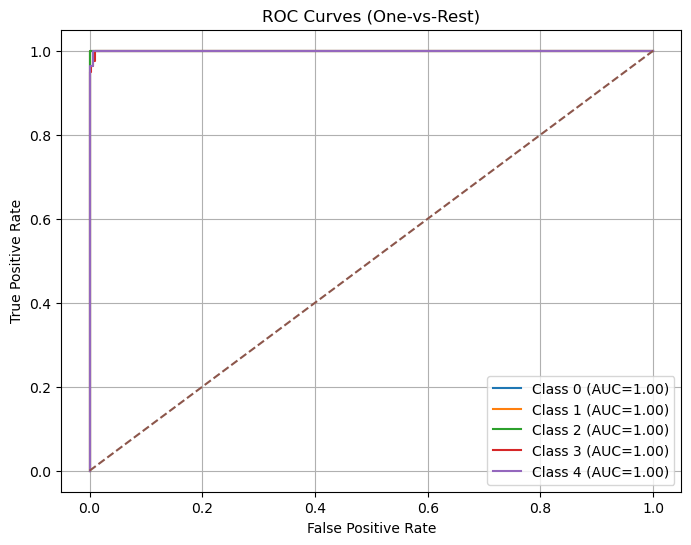

In [168]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

Y_test_bin = label_binarize(Y_test, classes=[0,1,2,3,4])
test_pred_bin = test_pred  # softmax probabilities

plt.figure(figsize=(8,6))
for i in range(5):
    fpr, tpr, _ = roc_curve(Y_test_bin[:,i], test_pred_bin[:,i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC={roc_auc:.2f})")

plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (One-vs-Rest)")
plt.legend()
plt.grid(True)
plt.show()


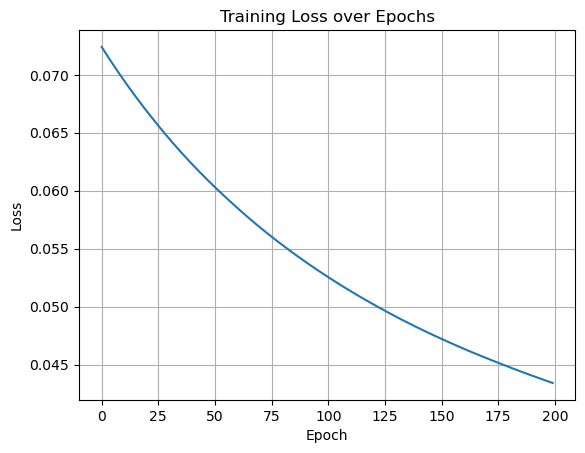

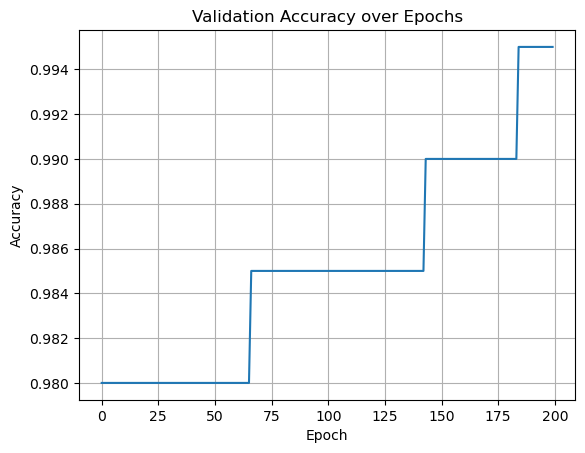

In [160]:
import matplotlib.pyplot as plt

# ---- Training Loss Plot ----
plt.figure()
plt.plot(train_losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# ---- Validation Accuracy Plot ----
plt.figure()
plt.plot(val_accuracies)
plt.title("Validation Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [162]:
# Forward pass on test data
_, _, _, _, _, _, _, test_out = feedforward(X_test)

# Convert softmax outputs to final class predictions
test_pred_labels = np.argmax(test_out, axis=1)

# Accuracy
test_accuracy = accuracy_score(Y_test, test_pred_labels)
print("  FINAL TEST PERFORMANCE  ")
print("Test Accuracy:", test_accuracy)

# Confusion Matrix
cm = confusion_matrix(Y_test, test_pred_labels)
print("\nConfusion Matrix (rows = true labels, cols = predicted labels):")
print(cm)

#show first 20 predictions
print("\nFirst 20 Test Predictions:")
print("Predicted:", test_pred_labels[:20])
print("Actual:   ", Y_test[:20])



  FINAL TEST PERFORMANCE  
Test Accuracy: 0.9925

Confusion Matrix (rows = true labels, cols = predicted labels):
[[80  0  0  0  0]
 [ 0 80  0  0  0]
 [ 0  0 80  0  0]
 [ 0  0  0 77  3]
 [ 0  0  0  0 80]]

First 20 Test Predictions:
Predicted: [4 3 4 1 0 1 1 4 4 2 1 3 1 2 2 4 3 2 0 3]
Actual:    [4 3 4 1 0 1 1 4 4 2 1 3 1 2 2 4 3 2 0 3]


The neural network worked really well after tuning everything. The training loss kept going down smoothly, and the validation accuracy went up almost to perfect. The final test accuracy was 99.25%, and the confusion matrix shows almost all predictions correct, with only a few mistakes in class 3. The ROC curves were also almost perfect, which means the model learned the classes very clearly. Changing things like learning rate, weight initialization, and clipping made a big difference — before fixing them, the model was stuck at 20% accuracy, but after fixing, it reached almost 100%.

Overall, the model performed extremely well on this 5-class task. I learned how important normalization, good initialization, and stable training are. For future improvement, I could try dropout, mini-batch training, or other optimizers, but with this dataset the network already gives near-perfect results.